## Grouted connections with shear keys (pre-installed piles)

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
from pint import UnitRegistry
u = UnitRegistry()

In [3]:
from math import pi
from numpy import sqrt

In [4]:
from IPython.core.display import Image
from IPython.display import display, Math

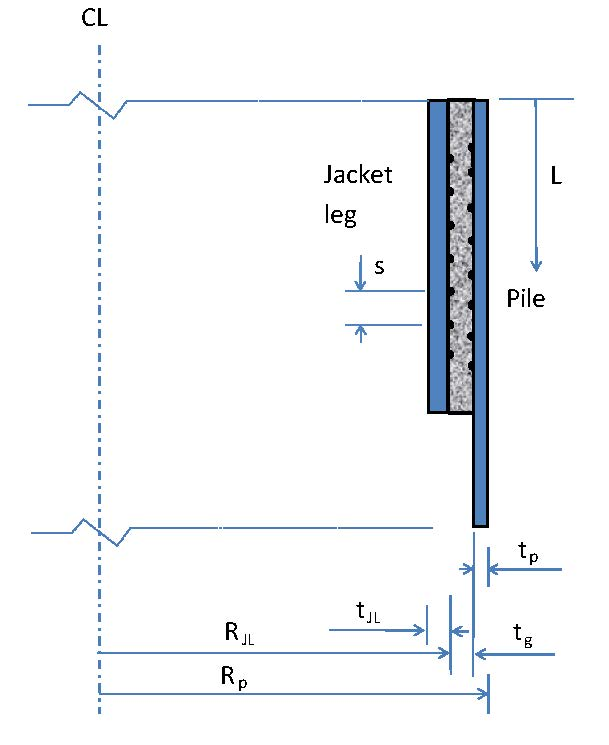

In [5]:
i = Image(filename='Page_from_DNVGL-ST-0126_Support_Structures_for_Offshore_Wind.jpg')
i.width=800
display(i)

$f_{ck}$, characteristic grout compressive strength

In [6]:
f_ck = 100*u.MPa

From DNVGL ST-0126 6.5.4.5

The following requirement for the nominal contact pressure due to bending and transverse shear
force shall be fulfilled:

$$
p_{nom,d} \le 1.5 \mathrm{MPa}
$$

Design loads

In [7]:
M_d = 6935*u.kN*u.m
Q_d = 1520*u.kN
P_ad = 10576*u.kN

Number of shear keys

In [8]:
n = 5

In [9]:
p_nomd = 1.5*u.MPa

Material factor for grout, $\gamma_c$

Note 2:

When the design is to be based on dimensional data that include specified tolerances at their most unfavourable limits, structural
imperfections, placement tolerances as to positioning of reinforcement, then these material factors can be used. When these factors
are used, then any geometric deviations from the "approved for construction" drawings must be evaluated and considered in relation
to the tolerances used in the design calculations.

In [10]:
gamma_m = gamma_c = 2

From DNVGL ST-0126 6.3.2.3

$$
f_{cn} = f_{ck} \left(1 - \frac{f_{ck}}{600}\right)
$$

In [11]:
f_cn = f_ck*(1 - f_ck/(600*u.MPa))
display(Math(r'f_{{ {} }} = {:0.2f} MPa'.format('cn',f_cn.magnitude)))

<IPython.core.display.Math object>

From DNVGL ST-0126 6.3.2.6

$$
f_{cd} = f_{cn}/\gamma_m
$$

In [12]:
f_cd = f_cn/gamma_m
display(Math(r'f_{{ {} }} = {:0.2f} MPa'.format('cd',f_cd.magnitude)))

<IPython.core.display.Math object>

From DNVGL ST-0126 C.1.4.3:

The interface shear capacity in the grouted connection with shear keys for pre-installed piles shall be taken as

$$
f_{bk} = \left[\frac{800}{D_{JL}} + 140 \left(\frac{h}{s}\right)^{0.8}\right]k^{0.6} f_{ck}^{0.3}
$$

where

\begin{align*}
h &= \mbox{height of shear key measured radially from the grout-steel interface}\\
D_{JL} &= \mbox{jacket leg diameter in units of mm}\\
s&= \mbox{vertical centre-to-centre distance between shear keys}\\
k&= \mbox{radial stiffness parameter defined}\\
\end{align*}

$k$ for a pre-installed pile is defined as 

$$
k = \left[\frac{2 R_{JL}}{t_{JL}} + \frac{2 R_{p}}{t_{p}}\right]^{-1} + \frac{E_g}{E}\left[\frac{2 R_p - 2 t_p}{t_g}\right]^{-1}
$$

where

\begin{align*}
E_g &= \mbox{Elastic modulus of the grout}\\
E &= \mbox{Elastic modulus of the steel}\\
R_p &= \mbox{outer radius of the pile}\\
t_p &= \mbox{wall thickness of pile}\\
R_{JL} &= \mbox{outer radius of jacket leg}\\
t_{JL} &= \mbox{wall thickness of jacket leg}\\
\end{align*}

However, the interface shear capacity shall not be taken larger than the limit set forth by grout matrix
failure,

$$
f_{bk} = \left[0.75 - 1.4 \frac{h}{s}\right] f_{ck}^{0.5}
$$

In [13]:
D_JL = (75.5*u.inch).to(u.mm)
h = 12*u.mm
w = 2*h
s = 165*u.mm
E_g = 60000*u.MPa
E = 210000*u.MPa
R_p = (84/2*u.inch).to(u.mm)
t_p = (1.5*u.inch).to(u.mm)
R_JL = D_JL/2
t_JL = (1.5*u.inch).to(u.mm) # As designed
t_g = R_p - R_JL
L_g = 2700*u.mm # As designed
D_g = 2*(R_p - t_p)
display(Math(r't_{{ {} }} = {:0.2f} mm'.format('g',t_g.magnitude)))

<IPython.core.display.Math object>

From DNVGL ST-0126 C.1.4.2

The design load per unit length along the circumference of one shear key shall be taken as

$$
F_{V1Shk,d} = \frac{P_{a,d}}{2 \pi R_{JL} n}
$$

In [14]:
F_V1Shkd = P_ad/(2*pi*R_JL*n)
display(Math(r'F_{{ {} }} = {:0.2f} MPa \cdot mm'.format('V1Shk,d',F_V1Shkd.magnitude)))

<IPython.core.display.Math object>

$$
I_{JL} = \frac{\pi}{4}\left(R^4 - R_i^4\right)
$$

In [15]:
I_JL = pi/4*(R_JL**4 - (R_JL - t_JL)**4)

In [16]:
k = 1/(2*R_JL/t_JL + 2*R_p/t_p) + (E_g/E)/((2*R_p - 2*t_p)/t_g)
display(Math(r'k = {:0.3f}'.format(k.magnitude)))

<IPython.core.display.Math object>

In [17]:
f_bk = (800/D_JL.magnitude + 140*(h/s)**0.8)*k**0.6*(f_ck.magnitude)**0.3
display(Math(r'f_{{ {} }} = {:0.2f} MPa'.format('bk',f_bk.magnitude)))

<IPython.core.display.Math object>

In [18]:
f_bk_max = (0.75 - 1.4*(h/s))*(f_ck.magnitude)**0.5
display(Math(r'f_{{ {} }}^{{ {}}} = {:0.2f} MPa'.format('bk','max',f_bk_max.magnitude)))

<IPython.core.display.Math object>

In [19]:
f_bk = min(f_bk, f_bk_max)*u.MPa
display(Math(r'f_{{ {} }} = {:0.2f} MPa'.format('bk',f_bk.magnitude)))

<IPython.core.display.Math object>

From DNVGL ST-0126 C.1.4.4:

The characteristic capacity per unit length of one shear key is

$$
F_{V1 Shk cap} = f_{bk} s
$$

In [20]:
F_V1Shkcap = f_bk*s
display(Math(r'F_{{ {} }} = {:0.2f} MPa \cdot mm'.format('V1 Shk cap',F_V1Shkcap.magnitude)))

<IPython.core.display.Math object>

From DNVGL ST-0126 C.1.4.5:

The design capacity per unit length of one shear key is

$$
F_{V1 Shk cap,d} = \frac{F_{V1 Shk cap}}{\gamma_m}
$$

In [21]:
F_V1Shkcapd = F_V1Shkcap/gamma_m
display(Math(r'F_{{ {} }} = {:0.2f} MPa \cdot mm'.format('V1 Shk cap,d',F_V1Shkcapd.magnitude)))

<IPython.core.display.Math object>

Utilization ratio

In [22]:
UR_shear = (F_V1Shkd/F_V1Shkcapd).to(u.dimensionless)
display(Math(r'UR_{{ {} }} = {:0.2f}'.format('shear',UR_shear.magnitude)))
if UR_shear <= 1.0:
    print('PASS')
else:
    print('FAIL')

<IPython.core.display.Math object>

PASS


From DNVGL ST-0126 C.1.4.6:

The following requirement for the vertical distance between shear keys shall be fulfilled

$$
s \ge \min\left(0.8 \sqrt{R_p t_p}, 0.8 \sqrt{R_{JL} t_{JL}}\right)
$$

In [23]:
s_min = min(0.8*sqrt(R_p*t_p), 0.8*sqrt(R_JL*t_JL))
display(Math(r's = {:0.3f} mm'.format(s.magnitude)))

<IPython.core.display.Math object>

In [24]:
if s >= s_min:
    print('PASS')
else:
    print('FAIL')

PASS


From DNVGL ST-0126 C.1.4.7:

$$
h \ge 5 \mathrm{mm} \quad 1.5 \le \frac{w}{h} \le 3.0 \quad \frac{h}{s} \le 0.10
$$

In [25]:
if h >= 5*u.mm:
    print('PASS')
else:
    print('FAIL')

PASS


In [26]:
if 1.5 <= w/h and w/h <= 3.0:
    print('PASS')
else:
    print('FAIL')

PASS


In [27]:
if h/s <= 0.1:
    print('PASS')
else:
    print('FAIL')

PASS


From DNVGL ST-0126 C.1.4.8:

It is recommended that the grout-length-to-pile-diameter ratio is kept within the following range:

$$
1 \le \frac{L_g}{D_{JL}} \le 10
$$

In [28]:
if 1 <= L_g/D_JL and L_g/D_JL <= 10:
    print('PASS')
else:
    print('FAIL')

PASS


In [29]:
display(Math(r'L_{{ {} }}/D_{{ {} }} = {:0.0f}'.format('g','JL',(L_g/D_JL).magnitude)))

<IPython.core.display.Math object>

From DNVGL ST-0126 C.1.4.9:

It is recommended that the grout dimensions meet the following limitations:

$$
10 \le \frac{D_g}{t_{g}} \le 45
$$

In [30]:
if 10 <= D_g/t_g and D_g/t_g <= 45:
    print('PASS')
else:
    print('FAIL')

PASS


From DNVGL ST-0126 C.1.4.10:

The following requirement for the geometry of the pile shall be fulfilled:

$$
10 \le \frac{R_{JL}}{t_{JL}} \le 30
$$

In [31]:
if 10 <= R_JL/t_JL and R_JL/t_JL <= 30:
    print('PASS')
else:
    print('FAIL')

PASS


From DNVGL ST-0126 C.1.4.13:

For connections involving pre-installed piles, the region which is significantly affected by the
bending moment is the region of the connection from a level half an elastic length below the top of the
connection and upwards.

The elastic length of the pile can be taken as

$$
l_e = \sqrt[4]{\frac{4 E I_{JL}}{k_{rD}}}
$$

From DNVGL ST-0126 C.1.4.14:

$$
k_{rD} = \frac{4 E R_{JL}}{\frac{R_p^2}{t_p} + \frac{R_{JL}^2}{t_{JL}} + t_g \frac{E}{E_g}}
$$

In [32]:
k_rD = (4*E*R_JL)/(R_p**2/t_p + R_JL**2/t_JL + t_g*E/E_g)
display(Math(r'k_{{ {} }} = {:0.0f} MPa'.format('rD',(k_rD).magnitude)))

<IPython.core.display.Math object>

In [33]:
l_e = ((4*E*I_JL)/k_rD)**0.25
display(Math(r'l_{{ {} }} = {:0.0f} mm'.format('e',(l_e).magnitude)))

<IPython.core.display.Math object>

From DNVGL ST-0126 C.1.4.15:

Unless data indicate otherwise, the maximum nominal radial contact pressure $p_{nom}$ at the
grouted connection, caused by the design horizontal shear force $Q_d$ and the design bending moment $M_d$ at
the bottom of the sleeve in case of post-installed piles, shall be derived from the following expression

$$
p_{nom} = \frac{l_e^2 k_{rD}}{8 E I_{JL} R_{JL}} \left(M_d + Q_d l_e\right)
$$

In [34]:
p_nom = (l_e**2*k_rD/(8*E*I_JL*R_JL)*(M_d + Q_d*l_e)).to(u.MPa)
display(Math(r'p_{{ {} }} = {:0.0f} MPa'.format('nom',(p_nom).magnitude)))

<IPython.core.display.Math object>

In [35]:
UR_p = (p_nom/p_nomd).to(u.dimensionless)
display(Math(r'UR_{{ {} }} = {:0.2f}'.format('p',UR_p.magnitude)))
if UR_p <= 1.0:
    print('PASS')
else:
    print('FAIL')

<IPython.core.display.Math object>

FAIL
